![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42


In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [6]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [52]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
12289,id_15350,London,"['Bar', 'Pub']",15362.0,NaN,10.0,"[['This pub is closed', 'Cool place.'], ['02/1...",/Restaurant_Review-g186338-d1436135-Reviews-Da...,d1436135,1,3.0
20613,id_14735,London,NaN,14746.0,NaN,NaN,"[['Avg fast fried chicken place, jumpy custom....",/Restaurant_Review-g186338-d5220238-Reviews-Mo...,d5220238,1,3.0
45215,id_991,Munich,"['Seafood', 'European', 'Vegetarian Friendly']",1000.0,$$$$,180.0,"[['Something different', 'Fun!'], ['01/04/2018...",/Restaurant_Review-g187309-d7740940-Reviews-Bu...,d7740940,1,3.5
13118,id_913,Milan,"['Italian', 'Mediterranean', 'European', 'Vege...",915.0,$$$$,398.0,"[['Affordable martini drink near Duomo', 'Grea...",/Restaurant_Review-g187849-d3445831-Reviews-Ma...,d3445831,1,4.0
20495,id_2690,Barcelona,"['Seafood', 'Mediterranean', 'European', 'Span...",2691.0,$$ - $$$,321.0,"[['Only average because the Paella was good', ...",/Restaurant_Review-g187497-d3136754-Reviews-Ch...,d3136754,1,3.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [53]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [54]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [55]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [56]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [ ]:
data.head(5)

In [ ]:
data.sample(5)

#### Возьмем следующий признак "Price Range".

In [57]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [58]:
#Заменим значения в 'Price Range' на 0 для пропусков, 1 для $, 2 для  $$-$$$ и 4 для  $$$$:

data['Price Range']=data['Price Range'].apply(lambda x: 1 if x=='$' else 2 if x=='$$ - $$$' else 3 if x=='$$$$' else 0)
data['Price Range'].value_counts()

2    23041
0    17361
1     7816
3     1782
Name: Price Range, dtype: int64

In [59]:
# Restaurant_id
# Cоздадим словарь для ресторанов с одинаковыми id:

count_chain_restaurants = dict(data.Restaurant_id.value_counts())

#создадим функцию для определения сетевых ресторанов:

def chain_restaurants(x):
    if count_chain_restaurants[x] > 1:
        return 1
    else:
        return 0
    
data['chain restaurants'] = data['Restaurant_id'].apply(chain_restaurants)

In [60]:
# Cuisine Style
# Заполним пропуски значением 'Standard':

data['Cuisine Style'] = data['Cuisine Style'].fillna('Standard')

In [61]:
# Изменим формат перечисления кухонь в список:

for i in ['\'', '[', ']']:
    data['Cuisine Style'] = data['Cuisine Style'].apply(
        lambda x: x.replace(i, ''))

data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.split(', '))

In [62]:
data['Cuisine Style'].explode().value_counts()

Vegetarian Friendly    14021
European               12561
Standard               11590
Mediterranean           7820
Italian                 7433
                       ...  
Fujian                     2
Salvadoran                 1
Burmese                    1
Xinjiang                   1
Latvian                    1
Name: Cuisine Style, Length: 126, dtype: int64

In [63]:
# Number of reviews
# Заполним пустые значения медианным числом отзывов:

data['Number of Reviews'] = data['Number of Reviews'].fillna(
    data['Number of Reviews'].median())

In [64]:
# Переведем значения в int,т.к кол-во отзывов не может быть дробным

data['Number of Reviews'] = data['Number of Reviews'].apply(lambda x: int(x))
data['Number of Reviews']

0          4
1         97
2         28
3        202
4        162
        ... 
49995     79
49996    542
49997      4
49998     70
49999    260
Name: Number of Reviews, Length: 50000, dtype: int64

In [65]:
# Reviews
# Сначала найдем самое частое значение
data['Reviews'].value_counts()

[[], []]                                                                                          8112
[['Delicious soup', 'My weekly treat'], ['03/19/2017', '07/30/2017']]                                2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]       2
[['The real codido madrileño'], ['03/31/2017']]                                                      2
[['Very cozy!', 'Service rate: 1'], ['01/17/2016', '11/18/2015']]                                    2
                                                                                                  ... 
[['Excellent breakfast', 'TOURIST TRAP, TOO EXPENSIVE'], ['02/16/2016', '06/28/2015']]               1
[['Opening night', 'For Tarantino fans'], ['08/22/2015', '06/07/2015']]                              1
[['enjoyed it very much'], ['11/12/2012']]                                                           1
[['Customers not welcome'], ['11/11/2016']]                              

In [66]:
# Заполним пропуски самым частым значением

data['Reviews'] = data['Reviews'].fillna('[[], []]')

In [67]:
# Признак 'Reviews' содержит в себе как сами отзывы, так и их даты. 
# Нас интересуют даты отзывов:

import datetime as dt

# Создаем функцию, которая возвращает число дней с последнего отзыва (на 18.08.2021).
# Возможны 3 варианта:
# - нет отзывов и дат, тогда возвращаем 6332 (кол-во дней между 18.08.2021 и 17.04.2004);
# - есть один отзыв и одна дата. Возвращаем разницу между этой датой и 18.08.2021;
# - есть 2 отзыва с датами. Возвращаем разницу между бОльшей из дат и 18.08.2021.

def days_from_last_rev(review):
    if review == '[[], []]':         
        days = 6332                 
    else:
        for i in ['[[', ']]']:
            review = review.replace(i, '')
        review = review.split('], [')
        review = review[1]
        review = review[1 : -1]
        review = review.split('\', \'')
        for i in range(len(review)):
            review[i] = dt.datetime.strptime(review[i], '%m/%d/%Y')
        if len(review) > 1:
            if review[0] > review[1]:                
                review = review[0]
            else:
                review = review[1]
        else:
            review = review[0]
        days = (dt.datetime(2021, 8, 18, 0, 0) - review).days   
    return days

In [68]:
# Сохраним результат в отдельную колонку:

data['Last_rev_period'] = data.Reviews.apply(days_from_last_rev)
data.Last_rev_period.head()

0    6332
1    1352
2    1329
3    1351
4    1287
Name: Last_rev_period, dtype: int64

In [69]:
# City
# Смотрим сколько уникальных значений городов в датасете, чтобы создать новые признаки.
data.City.unique()

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

In [70]:
# На основе данных о городах составим словарь, где у столиц будет значение - 1, и 0, если это не столица) 
capital = {
    'Paris': 1,
    'Stockholm':1,
    'London' : 1,
    'Berlin': 1,
    'Munich' : 0,
    'Oporto' : 0,
    'Milan' : 0,
    'Bratislava' : 1,
    'Vienna' : 0,
    'Rome' : 1,
    'Barcelona' : 0,
    'Madrid' : 1,
    'Dublin' : 1,
    'Brussels' : 1,
    'Zurich' : 0,
    'Warsaw' : 1,
    'Budapest' : 1,
    'Copenhagen' : 1,
    'Amsterdam' : 1,
    'Lyon' : 0,
    'Hamburg' : 0,
    'Lisbon' : 1,
    'Prague' : 1,
    'Oslo' : 1,
    'Helsinki': 1,
    'Edinburgh' : 1,
    'Geneva' : 0,
    'Ljubljana' : 1,
    'Athens' : 1,
    'Luxembourg' : 1,
    'Krakow': 0
}

In [71]:
# Создадим словарь с населением городов
population = {'Paris' : 2240635,
           'Stockholm' : 1981330,
           'London' : 8173921,
           'Berlin' : 3326095,
           'Munich' : 1471508,
           'Oporto' : 214935, 
           'Milan' : 1372434,
           'Bratislava' : 413207,
           'Vienna' : 1765700,
           'Rome' : 2870515,
           'Barcelona' : 1664182,
           'Madrid' : 3155368,
           'Dublin' : 544107,
           'Brussels' : 176545, 
           'Zurich' : 428737,
           'Warsaw' : 1766212,
           'Budapest' : 1751010,
           'Copenhagen' : 626508,
           'Amsterdam' : 825080,
           'Lyon' : 506615,
           'Hamburg' : 1841179,
           'Lisbon' : 506654,
           'Prague' : 1308632,
           'Oslo' : 681067,
           'Helsinki' : 645657,
           'Edinburgh' : 482005,
           'Geneva' : 198899,
           'Ljubljana' : 281226,
           'Athens' : 664046,
           'Luxembourg' : 119215,
           'Krakow' : 762776
          }

In [72]:
# Добавим новые колонки к датасету.

data['Capital'] = data['City'].apply(lambda x: capital[x])
data['Population'] = data['City'].apply(lambda x: population[x])

In [73]:
# Создадим dummies-переменную из City:

dummies_city = pd.get_dummies(data.City, dummy_na=True)

In [74]:
# Создадим dummies-переменную из Cuisine_Style:

dummies_cuisine = pd.get_dummies(
    data['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)

In [75]:
# Присоединим полученные dummies к датасету:

data = pd.concat([data, dummies_city], axis=1)
data = pd.concat([data, dummies_cuisine], axis=1)

In [76]:
# В столбец с Cuisine Style  запишем их количество:

data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: len(x))

In [77]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,id_0,Paris,2,12963.0,2,4,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,5,106.0,2,97,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,1,1,0,0,0,0,0,0
2,id_2,Edinburgh,1,810.0,2,28,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,1,0,0,0,0,0,0
3,id_3,London,5,1669.0,3,202,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,1,0,0,0,0,0,0
4,id_4,Bratislava,6,37.0,3,162,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,1,0,0,0,0,0,0


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

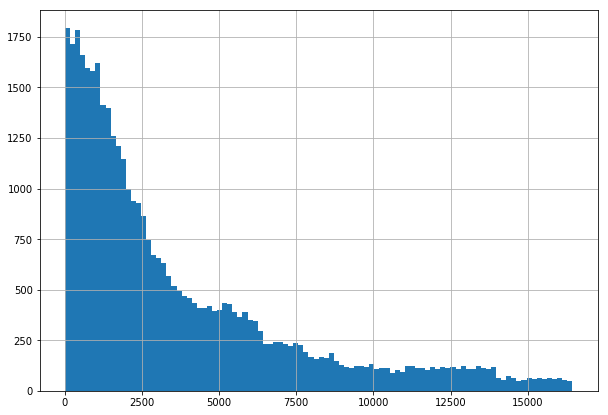

In [78]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

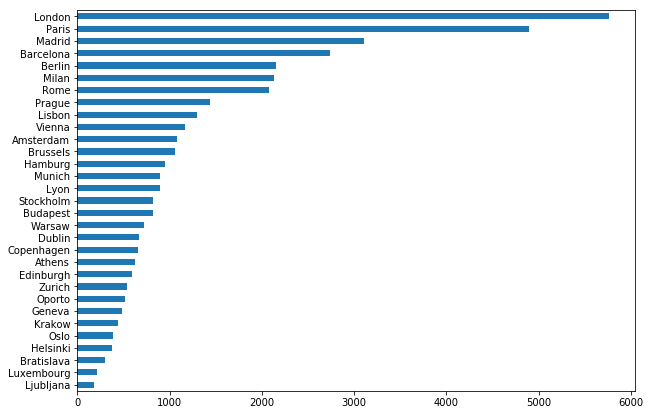

In [79]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

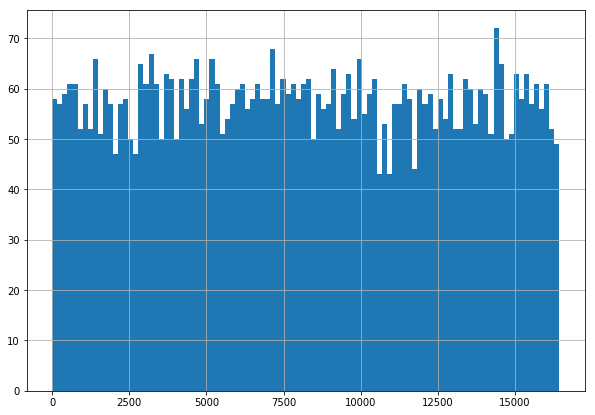

In [80]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

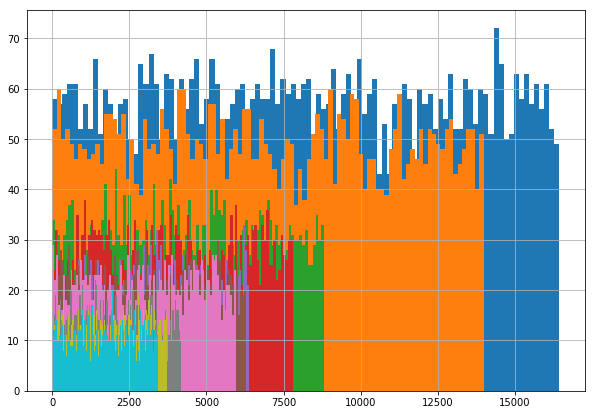

In [81]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

In [82]:
# Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, 
# из-за мы этого имеем смещение. Попробуем это исправить: разделив Ranking для каждого ресторана
# в отдельном городе на количество ресторанов в этом городе.

rest_count = {}

for i in range(len(data['City'].value_counts().index)):
    rest_count[data['City'].value_counts().index[i]] = data['City'].value_counts()[
        data['City'].value_counts().index[i]]
    
for i in range(len(data)):
    data['Ranking'][i] = (data['Ranking'][i] / rest_count[(data['City'][i])])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


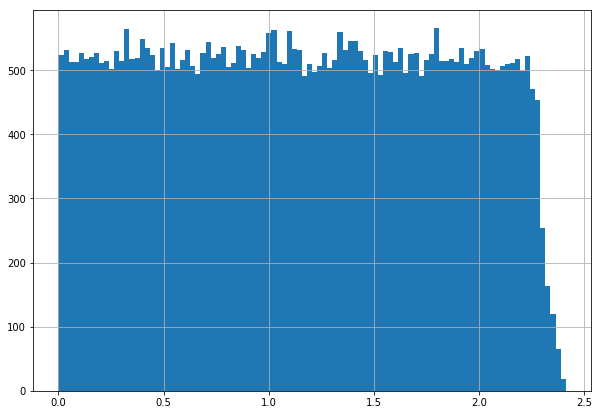

In [83]:
# Смотрим распределение теперь:

plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

### Посмотрим распределение целевой переменной

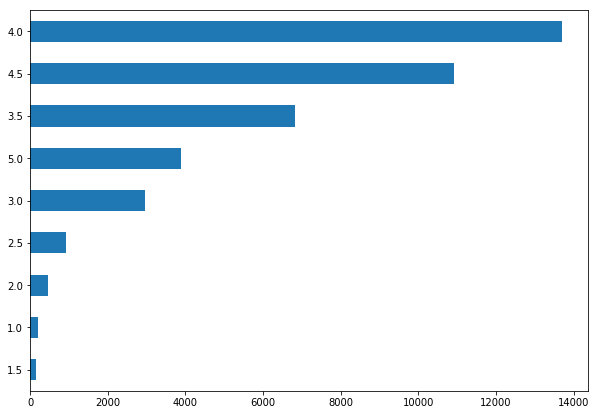

In [84]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

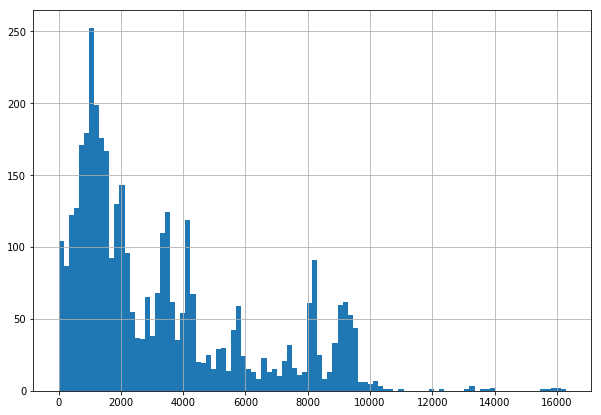

In [85]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

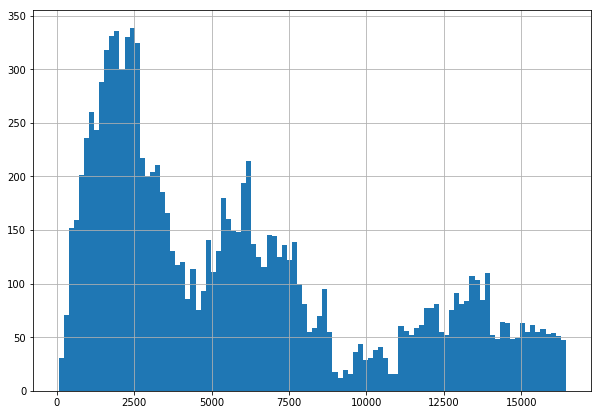

In [86]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

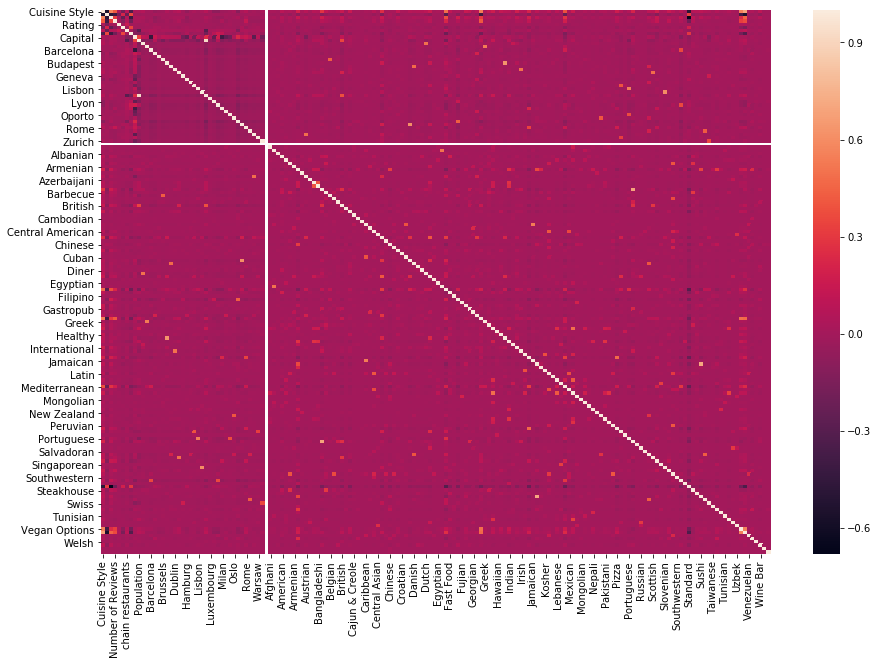

In [87]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [88]:
# Теперь можно удалить лишние столбцы City:

data.drop(['Reviews', 'City','URL_TA', 'ID_TA', 'Restaurant_id' ], axis = 1, inplace=True)

In [89]:
data.head()

,Cuisine Style,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,chain restaurants,Last_rev_period,Capital,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,2,2.122299,2,4,0,0.0,0,1,6332,1,...,0,0,0,0,0,0,0,0,0,0
1,5,0.223158,2,97,0,0.0,0,1,1352,1,...,0,0,1,1,0,0,0,0,0,0
2,1,1.087248,2,28,0,0.0,0,1,1329,1,...,0,0,0,1,0,0,0,0,0,0
3,5,0.232031,3,202,0,0.0,0,1,1351,1,...,0,0,0,1,0,0,0,0,0,0
4,6,0.097368,3,162,0,0.0,0,1,1287,1,...,0,0,0,1,0,0,0,0,0,0


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [7]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [10]:
import datetime as dt



def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    
    
    
     # ################### NAN ############################################################## 
    
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('Standard')
    df_output['Number of Reviews'] = data['Number of Reviews'].fillna(
    df_output['Number of Reviews'].median())
    df_output['Reviews'] = df_output['Reviews'].fillna('[[], []]')
      
    
    # ###################  Feature Engineering ####################################################
    
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    
    # Ranking 
    
    rest_count = {}

    for i in range(len(df_output['City'].value_counts().index)):
        rest_count[df_output['City'].value_counts().index[i]] = df_output['City'].value_counts()[
            df_output['City'].value_counts().index[i]]
    
    for i in range(len(data)):
        df_output['Ranking'][i] = (df_output['Ranking'][i] / rest_count[(df_output['City'][i])])
    
    # Price Range

    df_output['Price Range']= df_output['Price Range'].apply(lambda x: 1 if x=='$' else 2 if x=='$$ - $$$' else 3 if x=='$$$$' else 0)
    
    # Restaurant_id
    
    count_chain_restaurants = dict(data.Restaurant_id.value_counts())

    def chain_restaurants(x):
        if count_chain_restaurants[x] > 1:
            return 1
        else:
            return 0
    
    df_output['chain restaurants'] = df_output['Restaurant_id'].apply(chain_restaurants)
    
    # Cuisine Style
    
    for i in ['\'', '[', ']']:
        df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
            lambda x: x.replace(i, ''))

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: x.split(', '))
    
    # Number of reviews
    
    df_output['Number of Reviews'] = df_output['Number of Reviews'].apply(lambda x: int(x))
    
    # Reviews
    
    def days_from_last_rev(review):
        if review == '[[], []]':         
            days = 6332                 
        else:
            for i in ['[[', ']]']:
                review = review.replace(i, '')
            review = review.split('], [')
            review = review[1]
            review = review[1 : -1]
            review = review.split('\', \'')
            for i in range(len(review)):
                review[i] = dt.datetime.strptime(review[i], '%m/%d/%Y')
            if len(review) > 1:
                if review[0] > review[1]:                
                    review = review[0]
                else:
                    review = review[1]
            else:
                review = review[0]
            days = (dt.datetime(2021, 8, 18, 0, 0) - review).days   
        return days

    df_output['Last_rev_period'] = df_output['Reviews'].apply(days_from_last_rev)
    df_output.Last_rev_period.head()
    
    # # На основе данных о городах 'City' составим словарь, где у столиц будет значение - 1, и 0, если это не столица)
    
    capital = {
        'Paris': 1,
        'Stockholm':1,
        'London' : 1,
        'Berlin': 1,
        'Munich' : 0,
        'Oporto' : 0,
        'Milan' : 0,
        'Bratislava' : 1,
        'Vienna' : 0,
        'Rome' : 1,
        'Barcelona' : 0,
        'Madrid' : 1,
        'Dublin' : 1,
        'Brussels' : 1,
        'Zurich' : 0,
        'Warsaw' : 1,
        'Budapest' : 1,
        'Copenhagen' : 1,
        'Amsterdam' : 1,
        'Lyon' : 0,
        'Hamburg' : 0,
        'Lisbon' : 1,
        'Prague' : 1,
        'Oslo' : 1,
        'Helsinki': 1,
        'Edinburgh' : 1,
        'Geneva' : 0,
        'Ljubljana' : 1,
        'Athens' : 1,
        'Luxembourg' : 1,
        'Krakow': 0
        }
    
    # Создадим словарь с населением городов
    
    population = {
        'Paris' : 2240635,
        'Stockholm' : 1981330,
        'London' : 8173921,
        'Berlin' : 3326095,
        'Munich' : 1471508,
        'Oporto' : 214935, 
        'Milan' : 1372434,
        'Bratislava' : 413207,
        'Vienna' : 1765700,
        'Rome' : 2870515,
        'Barcelona' : 1664182,
        'Madrid' : 3155368,
        'Dublin' : 544107,
        'Brussels' : 176545, 
        'Zurich' : 428737,
        'Warsaw' : 1766212,
        'Budapest' : 1751010,
        'Copenhagen' : 626508,
        'Amsterdam' : 825080,
        'Lyon' : 506615,
        'Hamburg' : 1841179,
        'Lisbon' : 506654,
        'Prague' : 1308632,
        'Oslo' : 681067,
        'Helsinki' : 645657,
        'Edinburgh' : 482005,
        'Geneva' : 198899,
        'Ljubljana' : 281226,
        'Athens' : 664046,
        'Luxembourg' : 119215,
        'Krakow' : 762776
        }
    
    df_output['Capital'] = df_output['City'].apply(lambda x: capital[x])
    df_output['Population'] = df_output['City'].apply(lambda x: population[x])
           
    
    # ###################  Encoding ############################################################## 
    
    dummies_city = pd.get_dummies(df_output.City, dummy_na=True)
    dummies_cuisine = pd.get_dummies(df_output['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)
    
    df_output = pd.concat([df_output, dummies_city], axis=1)
    df_output = pd.concat([df_output, dummies_cuisine], axis=1)
    
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    # ################### Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    # убираем не нужные для модели признаки
    df_output.drop(['Reviews', 'City','URL_TA', 'ID_TA', 'Restaurant_id'], axis = 1, inplace=True)
    
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [11]:

df_preproc = preproc_data(data)
df_preproc.head(50)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Cuisine Style,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,chain restaurants,Last_rev_period,Capital,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,2,2.122299,2,4,0,0.0,0,1,6332,1,...,0,0,0,0,0,0,0,0,0,0
1,5,0.223158,2,97,0,0.0,0,1,1352,1,...,0,0,1,1,0,0,0,0,0,0
2,1,1.087248,2,28,0,0.0,0,1,1329,1,...,0,0,0,1,0,0,0,0,0,0
3,5,0.232031,3,202,0,0.0,0,1,1351,1,...,0,0,0,1,0,0,0,0,0,0
4,6,0.097368,3,162,0,0.0,0,1,1287,1,...,0,0,0,1,0,0,0,0,0,0
5,3,0.833824,1,24,0,0.0,0,1,1441,1,...,0,0,0,0,0,0,0,0,0,0
6,2,2.248937,1,2,0,0.0,0,1,6332,1,...,0,0,0,0,0,0,0,0,0,0
7,1,2.282076,0,33,0,0.0,0,1,6332,1,...,0,0,0,0,0,0,0,0,0,0
8,2,1.623158,0,2,0,0.0,0,1,1319,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0.585673,0,13,0,0.0,0,1,1355,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 169 entries, Cuisine Style to Yunnan
dtypes: float64(2), int64(8), uint8(159)
memory usage: 11.4 MB


In [13]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [14]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [15]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 168), (40000, 168), (40000, 167), (32000, 167), (8000, 167))

# Model 
Сам ML

In [16]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [17]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [18]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [19]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20666125


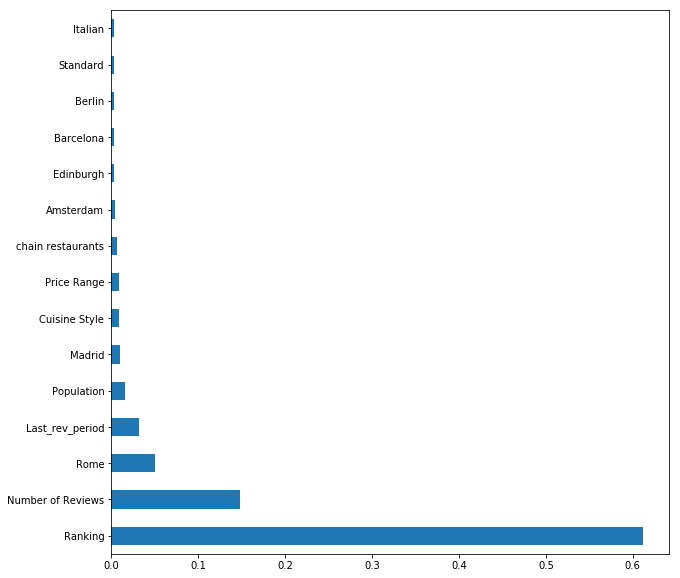

In [20]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [21]:
test_data.sample(10)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,chain restaurants,Last_rev_period,Capital,Population,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
9294,4,2.322271,2,109,0.0,0,0,1372,0,1471508,...,0,0,0,0,0,0,0,0,0,0
9110,3,0.203400,2,800,0.0,0,1,1296,1,506654,...,0,0,0,1,0,0,0,0,0,0
4760,1,1.626215,2,4,0.0,0,1,6332,0,1664182,...,0,0,0,0,0,0,0,0,0,0
569,7,0.315789,2,341,0.0,0,1,1334,1,544107,...,0,0,1,1,0,0,0,1,0,0
5087,1,1.374449,0,2,0.0,0,1,1509,1,1308632,...,0,0,0,0,0,0,0,0,0,0
8941,1,1.350427,0,33,0.0,0,1,2741,1,626508,...,0,0,0,0,0,0,0,0,0,0
8374,3,0.471240,2,69,0.0,0,1,1660,0,1765700,...,0,0,0,0,0,0,0,0,0,0
1137,2,1.000607,2,24,0.0,0,1,1269,1,506654,...,0,0,0,0,0,0,0,0,0,0
8353,6,1.890305,2,259,0.0,0,1,1486,1,2870515,...,0,0,0,0,0,0,0,1,0,0
3394,1,0.933472,0,8,0.0,0,1,1506,0,1765700,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test_data = test_data.drop(['Rating'], axis=1)

In [23]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [24]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [25]:
predict_submission

array([3.07 , 4.235, 4.475, ..., 3.195, 4.495, 4.355])

In [26]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.070
1,id_1,4.235
2,id_2,4.475
3,id_3,4.270
4,id_4,4.500
5,id_5,4.500
6,id_6,3.130
7,id_7,1.630
8,id_8,4.115
9,id_9,4.640


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
